In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("D:\PYTHON_MAIN_COURSE(IIIT-Bnglr)\COURSE-6 -ELECTIVES\HEALTHCARE\Assignment\diabetic_data_original.csv")

In [3]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
data.shape

(101766, 50)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [6]:
data.isnull().sum()/len(data.index)

encounter_id                0.0
patient_nbr                 0.0
race                        0.0
gender                      0.0
age                         0.0
weight                      0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
payer_code                  0.0
medical_specialty           0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburid

## List of unique values

In [7]:
# for each column
for col in list(data.columns):
    
    # get a list of unique values
    list_of_unique_values = data[col].unique()
    
    # if number of unique values is less than 15, print the values. Otherwise print the number of unique values
    if len(list_of_unique_values)<15:
        print(col+ ':' +str(len(list_of_unique_values)) + ' unique values')
        print(list_of_unique_values)
    else:
        print(col + ': ' +str(len(list_of_unique_values)) + ' unique values')

encounter_id: 101766 unique values
patient_nbr: 71518 unique values
race:6 unique values
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender:3 unique values
['Female' 'Male' 'Unknown/Invalid']
age:10 unique values
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight:10 unique values
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id:8 unique values
[6 1 2 3 4 5 8 7]
discharge_disposition_id: 26 unique values
admission_source_id: 17 unique values
time_in_hospital:14 unique values
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code: 18 unique values
medical_specialty: 73 unique values
num_lab_procedures: 118 unique values
num_procedures:7 unique values
[0 5 1 6 2 3 4]
num_medications: 75 unique values
number_outpatient: 39 unique values
number_emergency: 33 unique values
number_inpatient: 21 unique values
diag_1: 717 unique values
diag_2: 749 

In [8]:
round(data.weight.value_counts()/len(data.index)*100,2)

?            96.86
[75-100)      1.31
[50-75)       0.88
[100-125)     0.61
[125-150)     0.14
[25-50)       0.10
[0-25)        0.05
[150-175)     0.03
[175-200)     0.01
>200          0.00
Name: weight, dtype: float64

In [9]:
data.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                         True
gender                      False
age                         False
weight                       True
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                   True
medical_specialty            True
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                       True
diag_2                       True
diag_3                       True
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide 

In [10]:
df_1 = data.loc[(data.race=='?'),:]
round(df_1.shape[0]/len(data.index)*100,0)

2.0

In [11]:
df_1 = data.loc[(data.weight=='?'),:]
round(df_1.shape[0]/len(data.index)*100,0)

97.0

In [12]:
df_1 = data.loc[(data.payer_code=='?'),:]
round(df_1.shape[0]/len(data.index)*100,0)

40.0

In [13]:
df_1 = data.loc[(data.medical_specialty=='?'),:]
round(df_1.shape[0]/len(data.index)*100,0)

49.0

In [14]:
df_1 = data.loc[(data.diag_1=='?'),:]
round(df_1.shape[0]/len(data.index)*100,0)

0.0

In [15]:
df_1 = data.loc[(data.diag_2=='?'),:]
round(df_1.shape[0]/len(data.index)*100,0)

0.0

In [16]:
df_1 = data.loc[(data.diag_3=='?'),:]
round(df_1.shape[0]/len(data.index)*100,0)

1.0

'?' is nothing but missing values. Weight , medical speciality, payer code have high percent of missing values.
So just droppung them would be good

In [17]:
data.drop(['weight', 'medical_specialty', 'payer_code'], axis=1, inplace=True)

In [18]:
data.shape

(101766, 47)

### Dropping those columns which have only 1 unique value, as these won't add anything to our analysis.

In [19]:
data = data.loc[:,data.nunique()!=1]

In [20]:
data.shape

(101766, 45)

In [21]:
df = set(data[(data['diag_1'] == '?') & (data['diag_2'] == '?') & (data['diag_3'] == '?')].index)
df = df.union(set(data['gender'][data['gender'] == 'Unknown/Invalid'].index))

df_new = list(set(data.index) - set(df))
data = data.iloc[df_new]

In [22]:
data.shape

(101762, 45)

Only 2% of the race data are missing and we can get rid of all such records without much loss of information.

In [23]:
data = data[data.race != '?']

In [24]:
for col in data.columns:
    if data[col].dtype == object and data[col][data[col] == '?'].count()>0:
         print(col,':',data[col][data[col] == '?'].count(),':',round((data[col][data[col] == '?'].count()/len(data))*100),'%')

diag_1 : 18 : 0.0 %
diag_2 : 335 : 0.0 %
diag_3 : 1348 : 1.0 %


# Target Variable

Our target column is 'readmiited' .We want to know whether a patient gets readmitted to the hospital  or not. 
The variable has < 30, > 30 and No Readmission categories.  we combined the 
readmission before 30 days and after 30 days into one category(assign 1) 
and no readmission into another category(assign 0) to make it into binary classification

In [25]:
data['readmitted'] = data['readmitted'].replace('>30', 1)
data['readmitted'] = data['readmitted'].replace('<30', 1)
data['readmitted'] = data['readmitted'].replace('NO', 0)
# Convert all values to int
data['readmitted'] = data['readmitted'].astype(int)

In [26]:
round(data.readmitted.value_counts()/len(data.index)*100,0)

0    54.0
1    46.0
Name: readmitted, dtype: float64

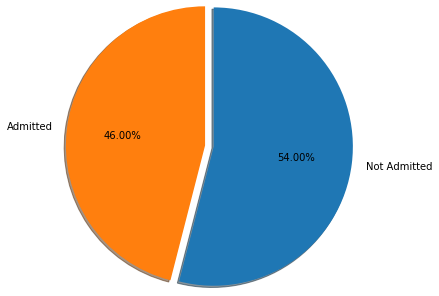

In [27]:
percent = round(data.readmitted.value_counts()/len(data.index)*100,0)

sub=['Not Admitted' , 'Admitted']

plt.axis("equal")
plt.pie(percent , labels=sub,radius=1.6,autopct='%1.2f%%',explode=[0.05,0.05],startangle=90,shadow=True,counterclock=False,pctdistance=0.6)
plt.show()

## Almost 46% patients readmitted to the hospital.

In [28]:
adm_pivot_df= data.pivot_table(values=['encounter_id'],index=['readmitted'],aggfunc='sum')
adm_pivot_df

,encounter_id
readmitted,
0,9000883521934
1,7417682345860


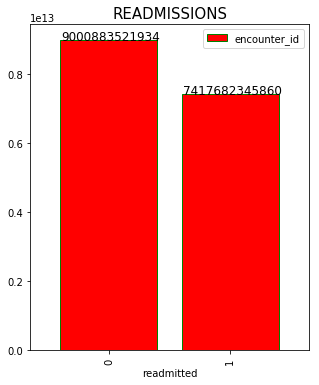

In [29]:
fig = adm_pivot_df.plot(kind='bar',figsize=(5,6), width=0.8,edgecolor='g',color =['r'])

for i in fig .patches:
 # get_x pulls left or right; get_height pushes up or down
    fig.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=12, color='black',
                rotation=0)
plt.title("READMISSIONS",fontsize= 15)
plt.show()

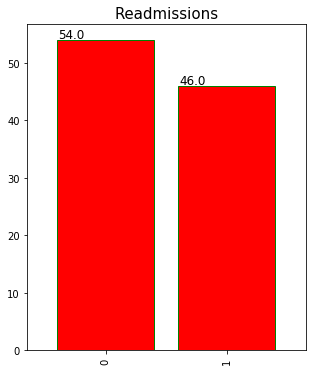

In [30]:
fig = round(data.readmitted.value_counts()/len(data.index)*100,0).plot.bar(figsize=(5,6), width=0.8,edgecolor='g',color =['r'])

for i in fig .patches:
 # get_x pulls left or right; get_height pushes up or down
    fig.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=12, color='black',
                rotation=0)
plt.title("Readmissions",fontsize= 15)
plt.show()

In [31]:
data.corr()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
encounter_id,1.000000,0.514189,-0.157600,-0.134813,-0.114321,-0.063577,-0.027759,-0.013164,0.073469,0.104212,0.083502,0.030624,0.261791,-0.039863
patient_nbr,0.514189,1.000000,-0.012412,-0.141297,-0.035135,-0.025912,0.014931,-0.019026,0.015859,0.102740,0.061517,0.011236,0.219889,0.072899
admission_type_id,-0.157600,-0.012412,1.000000,0.081922,0.108711,-0.012403,-0.142432,0.128789,0.079812,0.026707,-0.019491,-0.038240,-0.118789,-0.005526
discharge_disposition_id,-0.134813,-0.141297,0.081922,1.000000,0.016731,0.162843,0.023037,0.015100,0.107668,-0.009843,-0.025488,0.019547,0.042793,-0.016698
admission_source_id,-0.114321,-0.035135,0.108711,0.016731,1.000000,-0.007361,0.048735,-0.134199,-0.054901,0.025957,0.059502,0.035427,0.069808,0.037804
time_in_hospital,-0.063577,-0.025912,-0.012403,0.162843,-0.007361,1.000000,0.317684,0.193262,0.466398,-0.009543,-0.009799,0.073401,0.220685,0.051018
num_lab_procedures,-0.027759,0.014931,-0.142432,0.023037,0.048735,0.317684,1.000000,0.058461,0.267014,-0.008568,-0.002236,0.039737,0.151542,0.038700
num_procedures,-0.013164,-0.019026,0.128789,0.015100,-0.134199,0.193262,0.058461,1.000000,0.385534,-0.024930,-0.038365,-0.065835,0.072386,-0.043859
num_medications,0.073469,0.015859,0.079812,0.107668,-0.054901,0.466398,0.267014,0.385534,1.000000,0.044529,0.012965,0.064998,0.258622,0.046483
number_outpatient,0.104212,0.102740,0.026707,-0.009843,0.025957,-0.009543,-0.008568,-0.024930,0.044529,1.000000,0.090940,0.106235,0.092452,0.080688


# Plotting a heatmap 

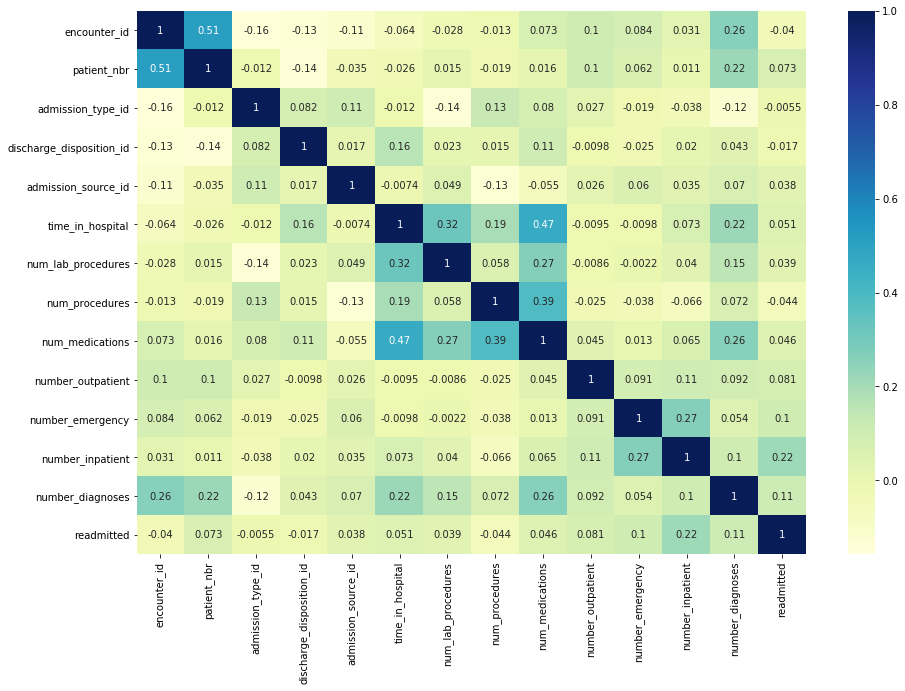

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)
plt.show()

 Readmission depends on Number of inpatient visits of the patient in the year preceding the encounter


C:\Users\apurv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


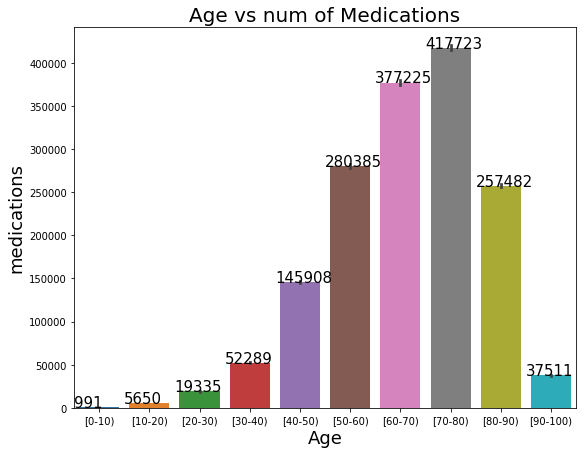

In [33]:
plt.figure(figsize=(9,7))
figx = sns.barplot(x='age', y='num_medications',estimator=np.sum, data=data)
plt.xlabel("Age",fontsize=18,color='black')
plt.ylabel("medications",fontsize=18,color='black')
plt.title("Age vs num of Medications",fontsize=20,color='black')

for i in figx.patches:
     # get_x pulls left or right; get_height pushes up or down
    figx.text(i.get_x()-.1, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)

plt.show()

### Age GROUP 70-80 has the hisghest number of of distinct generic names administered during the encounter

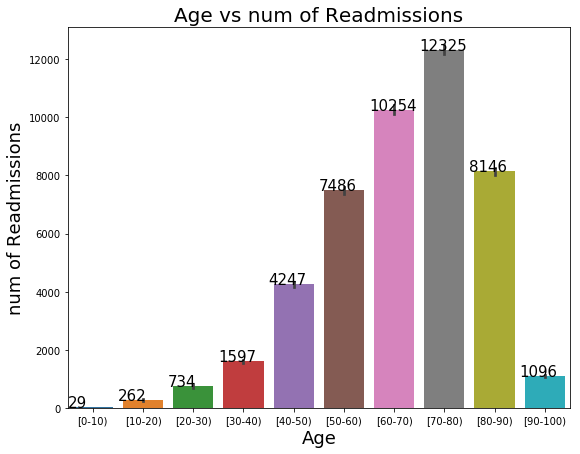

In [34]:
plt.figure(figsize=(9,7))
figx = sns.barplot(x='age', y='readmitted',estimator=np.sum, data=data)
plt.xlabel("Age",fontsize=18,color='black')
plt.ylabel("num of Readmissions",fontsize=18,color='black')
plt.title("Age vs num of Readmissions",fontsize=20,color='black')

for i in figx.patches:
     # get_x pulls left or right; get_height pushes up or down
    figx.text(i.get_x()-.1, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)

plt.show()

### Age group 70-80 has the highest number of readmissions.

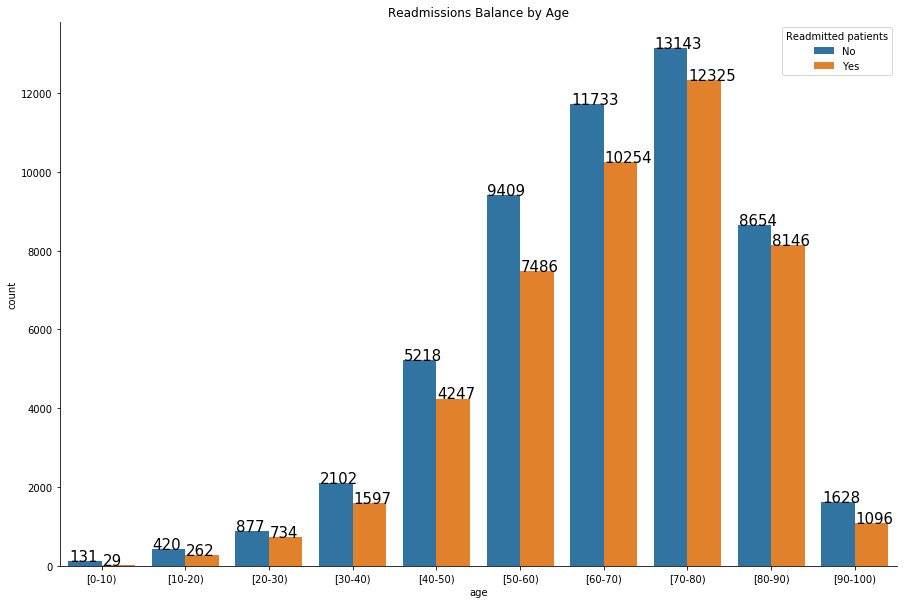

In [35]:
#Age and Readmissions,
plt.figure(figsize=(10,12))
figx = sns.countplot(x = 'age', hue = 'readmitted', data = data) 

for i in figx.patches:
     # get_x pulls left or right; get_height pushes up or down
    figx.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)



sns.despine()
figx.figure.set_size_inches(15, 10)
figx.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
figx.axes.set_title('Readmissions Balance by Age')
plt.show()

## Segment wise breakdown of how many people went for readmissions.

In [36]:
age_ct = pd.crosstab(data.age , data.readmitted ,margins=True, normalize='index')*100
age_ct

readmitted,0,1
age,,
[0-10),81.875000,18.125000
[10-20),61.583578,38.416422
[20-30),54.438237,45.561763
[30-40),56.826169,43.173831
[40-50),55.129424,44.870576
[50-60),55.691033,44.308967
[60-70),53.363351,46.636649
[70-80),51.605937,48.394063
[80-90),51.511905,48.488095


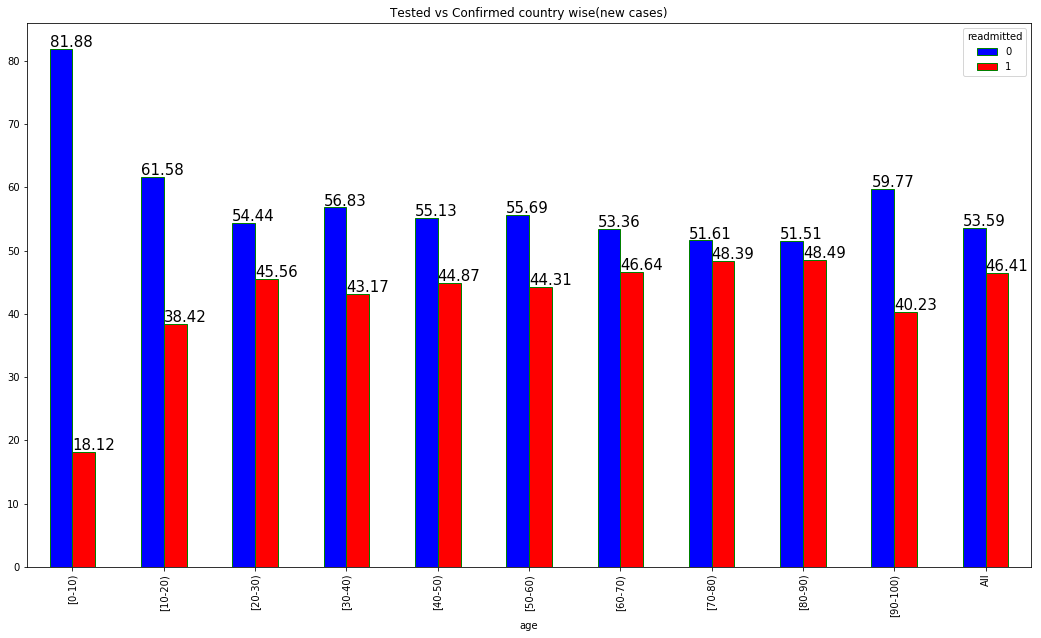

In [37]:
fig = age_ct.plot(kind='bar',figsize=(18,10), width=0.5,edgecolor='g', color = ['b','r'])
for i in fig .patches:
 # get_x pulls left or right; get_height pushes up or down
    fig.text(i.get_x()+0.00, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.title("Tested vs Confirmed country wise(new cases)",fontsize= 12)
plt.show()

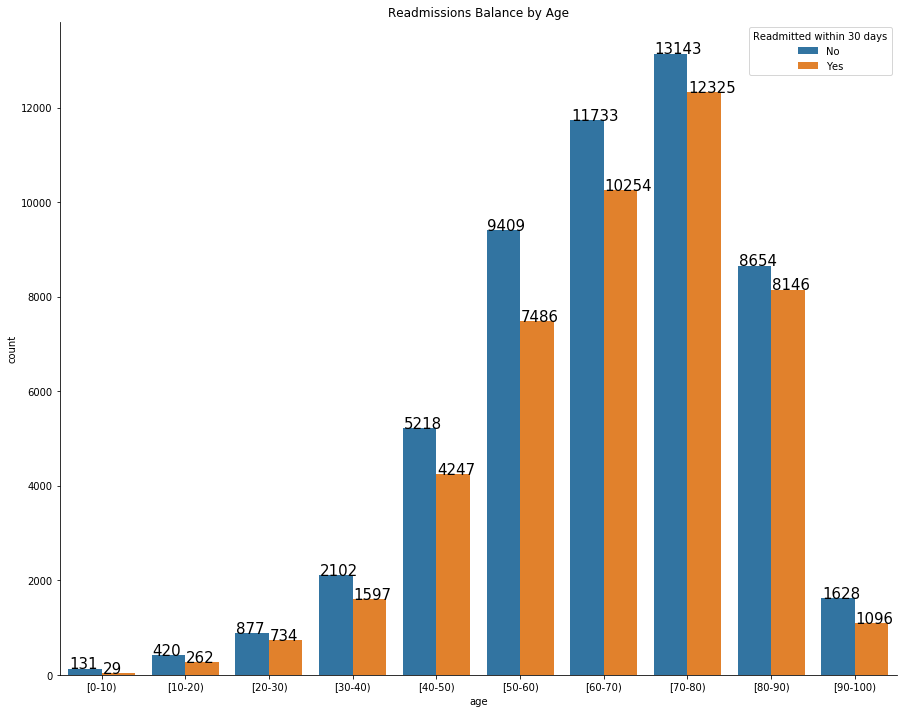

In [38]:
b = data.age.unique()
b.sort()
b_sort = np.array(b).tolist()


ageplt = sns.countplot(x = 'age', hue = 'readmitted', data = data, order = b_sort) 

for i in ageplt.patches:
     # get_x pulls left or right; get_height pushes up or down
    ageplt.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)


sns.despine()
ageplt.figure.set_size_inches(15, 12)
ageplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmissions Balance by Age')
plt.show()

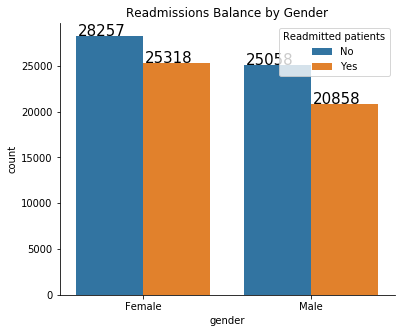

In [39]:

figx = sns.countplot(x = 'gender', hue = 'readmitted', data = data) 

for i in figx.patches:
     # get_x pulls left or right; get_height pushes up or down
    figx.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)



sns.despine()
figx.figure.set_size_inches(6,5)
figx.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
figx.axes.set_title('Readmissions Balance by Gender')
plt.show()

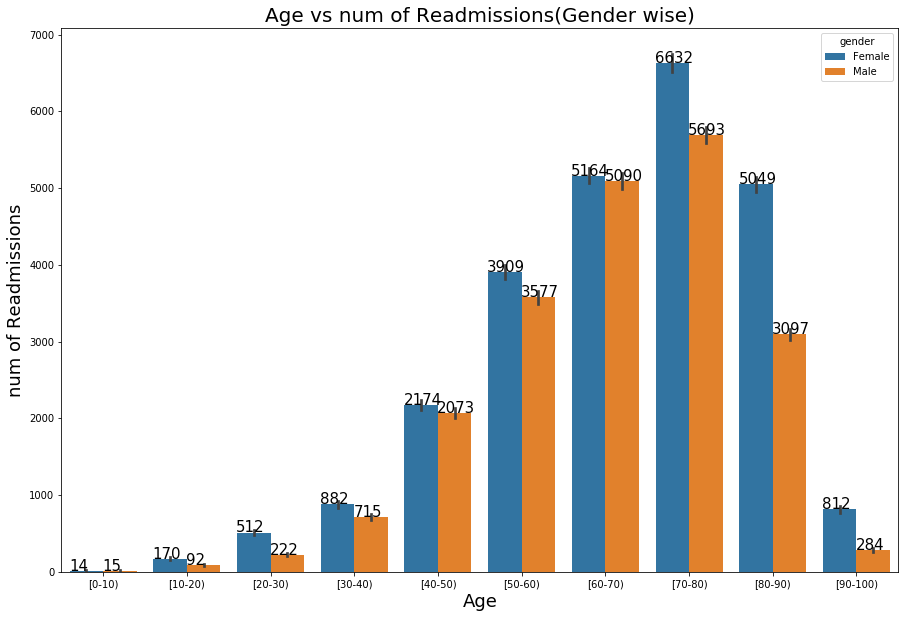

In [40]:
plt.figure(figsize=(15,10))
figx = sns.barplot(x='age', y='readmitted',hue = 'gender',estimator=np.sum, data=data)
plt.xlabel("Age",fontsize=18,color='black')
plt.ylabel("num of Readmissions",fontsize=18,color='black')
plt.title("Age vs num of Readmissions(Gender wise)",fontsize=20,color='black')

for i in figx.patches:
     # get_x pulls left or right; get_height pushes up or down
    figx.text(i.get_x()-.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)

plt.show()

## Females in each age group have more readmissions.

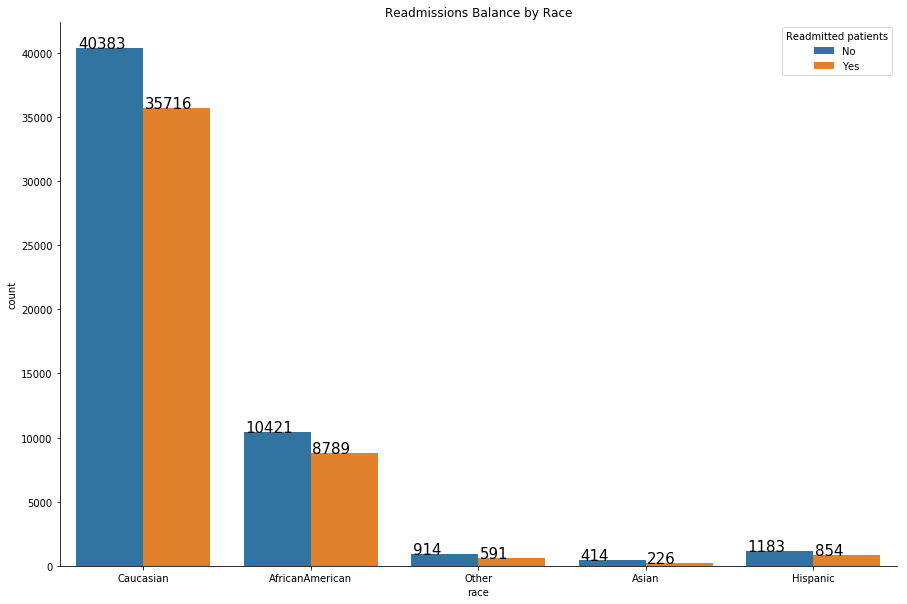

In [41]:
#Race and Readmissions,
plt.figure(figsize=(10,12))
figx = sns.countplot(x = 'race', hue = 'readmitted', data = data) 

for i in figx.patches:
     # get_x pulls left or right; get_height pushes up or down
    figx.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)



sns.despine()
figx.figure.set_size_inches(15, 10)
figx.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
figx.axes.set_title('Readmissions Balance by Race')
plt.show()

In [42]:
rc_ct = pd.crosstab(data.race , data.readmitted ,margins=True, normalize='index')*100
rc_ct

readmitted,0,1
race,,
AfricanAmerican,54.247788,45.752212
Asian,64.687500,35.312500
Caucasian,53.066400,46.933600
Hispanic,58.075601,41.924399
Other,60.730897,39.269103
All,53.587762,46.412238


# Feature Engineering

The dataset only gives us age as 10 year categories, so we don’t know the exact age of each patient.  we assume that age of the patient on average lies at the midpoint of the age category. For example, if the patient’s age category is 20–30 years, then we assume the age = 25 years. So we converted age categories to midpoints, resulting in a numeric variable:

In [43]:
age_dict = {"[0-10)":5, "[10-20)":15, "[20-30)":25, "[30-40)":35, "[40-50)":45, 
            "[50-60)":55, "[60-70)":65, "[70-80)":75, "[80-90)":85, "[90-100)":95 }
data['age'] = data.age.map(age_dict)
data['age'] = data['age'].astype('int64')

In [44]:
data.age.value_counts()

75    25468
65    21987
55    16895
85    16800
45     9465
35     3699
95     2724
25     1611
15      682
5       160
Name: age, dtype: int64

#### A closer look to IDs_mapping.csv  will reveal that 'admission_type_id' ,'discharge_disposition_id' and 'admission_source_id' have values with similar meaning. They can be merged to have fewer values

In [45]:
# merge ids with same meaning
def merge(data, col, same_ids):
    for ids in same_ids:
        for k in ids[1:]:
            data[col] = data[col].replace(k, ids[0])
    return data

data = merge(data, 'admission_type_id', [
    [1, 2, 7],  # emergence
    [5, 6, 8],  # not avaliable
])
data = merge(data, 'discharge_disposition_id', [
    [18, 25, 26],  # not avaliable
    [1, 6, 8],  # to home
    [2, 3, 4, 5],  # discharge to another hospital
    [10, 12, 15, 16, 17],  # discharge to outpatient
])
data = merge(data, 'admission_source_id', [
    [1, 2, 3], # Referral
    [4, 5, 6, 10, 22, 25], # from another hospital
    [9, 15, 17, 20, 21]  # not avaliable
])

In [46]:
data.shape

(99491, 45)

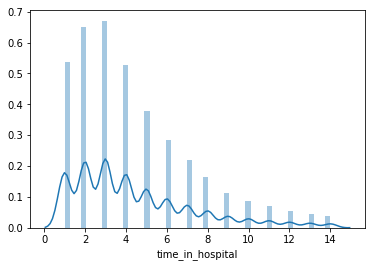

In [47]:
sns.distplot(data['time_in_hospital'], hist= True)

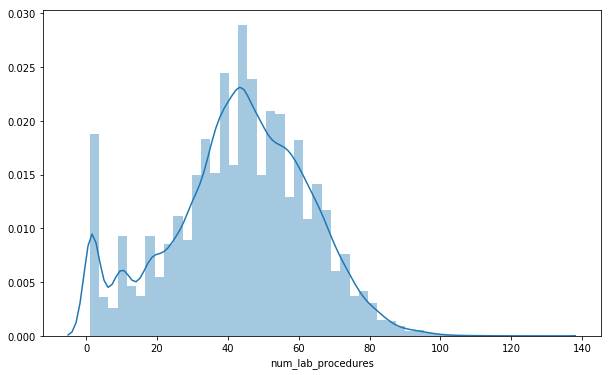

In [48]:
plt.figure(figsize=(10,6))
sns.distplot(data['num_lab_procedures'], hist= True)

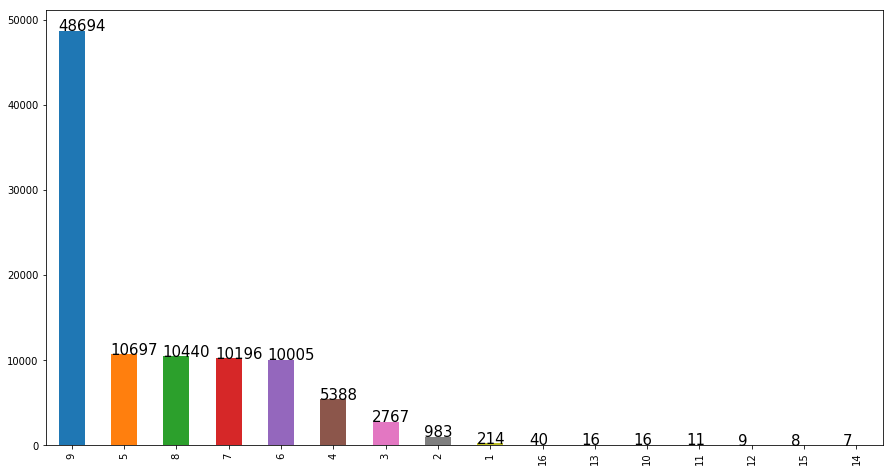

In [49]:
plt.figure(figsize=(15,8))
figx = data['number_diagnoses'].value_counts().plot.bar()
for i in figx.patches:
     # get_x pulls left or right; get_height pushes up or down
    figx.text(i.get_x()-.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)


plt.show()

C:\Users\apurv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


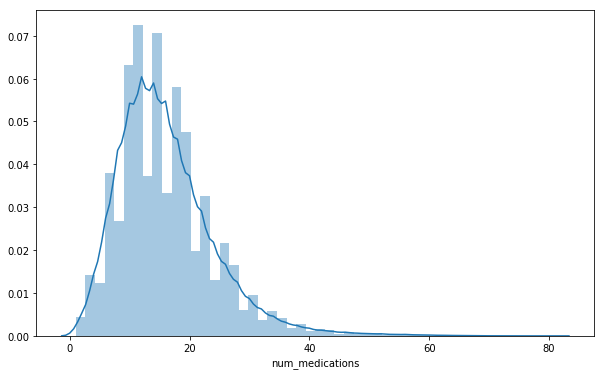

In [50]:
plt.figure(figsize=(10,6))
sns.distplot(data['num_medications'], hist= True)

### Let us add a column 'comorbidity' as defined in the problem statement . To achieve this first we will create a new dataframe using diag_1 , diag_2 and diag_3 of the original data set.

In [51]:
diagnosis=data[['diag_1', 'diag_2', 'diag_3']]
diagnosis.head(10)

,diag_1,diag_2,diag_3
0,250.83,?,?
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250
6,414,411,V45
7,428,492,250
8,398,427,38
9,434,198,486


In [52]:
# Replace all '?' with 0
diagnosis = diagnosis.replace('?',0)
diagnosis.head(10)

,diag_1,diag_2,diag_3
0,250.83,0,0
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250
6,414,411,V45
7,428,492,250
8,398,427,38
9,434,198,486


## Now let us define a function to calculate comorbidity.

In [53]:
import  re
def calculate_Comorbidity(row):
    diabetes_code = "^[2][5][0]"
    circulatory_code = "^[3][9][0-9]|^[4][0-5][0-9]"
    value =0
    
    if  (   not(bool(re.match(diabetes_code,str(np.array(row['diag_1']))))) and
            not(bool(re.match(diabetes_code,str(np.array(row['diag_2'])))))and 
            not(bool(re.match(diabetes_code,str(np.array(row['diag_3'])))))
        ) and (not(bool(re.match(circulatory_code,str(np.array(row['diag_1']))))) and 
              not(bool(re.match(circulatory_code,str(np.array(row['diag_2'])))))and 
              not(bool(re.match(circulatory_code,str(np.array(row['diag_3'])))))
        ):
        value= 0
    if (  bool(re.match(diabetes_code,str(np.array(row['diag_1'])))) or 
          bool(re.match(diabetes_code,str(np.array(row['diag_2'])))) or 
          bool(re.match(diabetes_code,str(np.array(row['diag_3']))))
         )and (not(bool(re.match(circulatory_code,str(np.array(row['diag_1']))))) and 
              not(bool(re.match(circulatory_code,str(np.array(row['diag_2']))))) and 
              not(bool(re.match(circulatory_code,str(np.array(row['diag_3'])))))
         ): value= 1
        
    if (   not(bool(re.match(diabetes_code,str(np.array(row['diag_1']))))) and
            not(bool(re.match(diabetes_code,str(np.array(row['diag_2'])))))and 
            not(bool(re.match(diabetes_code,str(np.array(row['diag_3'])))))
        ) and (bool(re.match(circulatory_code,str(np.array(row['diag_1'])))) or 
               bool(re.match(circulatory_code,str(np.array(row['diag_2'])))) or 
               bool(re.match(circulatory_code,str(np.array(row['diag_3']))))
         ):
          value= 2
    if (  bool(re.match(diabetes_code,str(np.array(row['diag_1'])))) or 
          bool(re.match(diabetes_code,str(np.array(row['diag_2'])))) or 
          bool(re.match(diabetes_code,str(np.array(row['diag_3']))))
         )and (bool(re.match(circulatory_code,str(np.array(row['diag_1'])))) or 
               bool(re.match(circulatory_code,str(np.array(row['diag_2'])))) or 
               bool(re.match(circulatory_code,str(np.array(row['diag_3']))))
         ):
            value= 3 
    
    return value

In [54]:
data['comorbidity'] = diagnosis.apply(calculate_Comorbidity, axis=1)

In [55]:
data.comorbidity.head()

0    1
1    1
2    1
3    3
4    1
Name: comorbidity, dtype: int64

In [56]:
data.diag_1

0         250.83
1            276
2            648
3              8
4            197
5            414
6            414
7            428
8            398
9            434
10         250.7
11           157
12           428
13           428
14           518
15           999
16           410
17           682
18           402
22           410
23           V57
24           189
25           786
26           427
27           996
28           277
29           428
30           584
31           462
32           996
           ...  
101736       590
101737       182
101738       275
101739       414
101740       414
101741       820
101742     250.8
101743       486
101744       427
101745       682
101746       427
101747       410
101748       295
101749       715
101750       574
101751       424
101752       348
101753     250.8
101754       574
101755       592
101756       996
101757       491
101758       292
101759       435
101760       345
101761    250.13
101762       560
101763        

In [57]:
data.drop(['diag_1','diag_2','diag_3'], axis=1, inplace=True)

In [58]:
com_ct = pd.crosstab(data.comorbidity , data.readmitted , normalize='index')*100
com_ct

readmitted,0,1
comorbidity,,
0,55.634081,44.365919
1,54.692036,45.307964
2,51.762270,48.237730
3,53.834063,46.165937


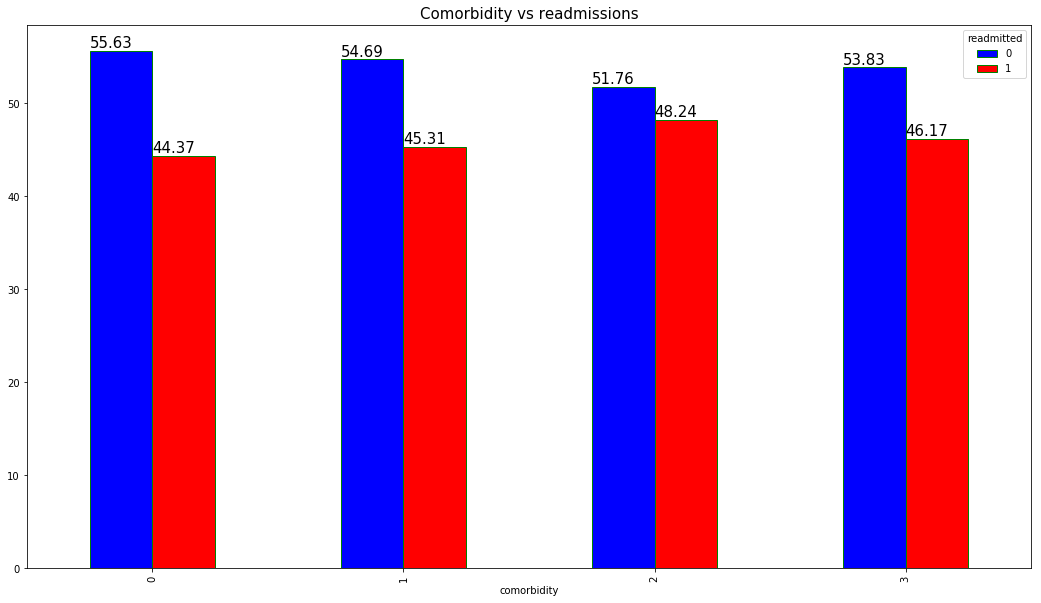

In [59]:
fig = com_ct.plot(kind='bar',figsize=(18,10), width=0.5,edgecolor='g', color = ['b','r'])
for i in fig .patches:
 # get_x pulls left or right; get_height pushes up or down
    fig.text(i.get_x()+0.00, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.title("Comorbidity vs readmissions",fontsize= 15)
plt.show()

In [60]:
com_age_ct =  pd.crosstab([data.readmitted , data.age ], data.comorbidity)
com_age_ct

comorbidity        0     1     2     3
readmitted age                        
0          5       2   128     0     1
           15     28   377     6     9
           25    164   619    33    61
           35    521  1029   240   312
           45   1292  1726  1152  1048
           55   2126  2084  3098  2101
           65   2728  1811  4747  2447
           75   3095  1683  6142  2223
           85   2232   933  4304  1185
           95    486   159   780   203
1          5       1    28     0     0
           15     17   237     1     7
           25     89   536    27    82
           35    322   817   189   269
           45   1026  1418   941   862
           55   1683  1603  2643  1557
           65   2286  1545  4437  1986
           75   2573  1537  6037  2178
           85   1879   894  4223  1150
           95    231   124   608   133

In [61]:
a1_ct = pd.crosstab(data['number_inpatient'], data['A1Cresult'])
a1_ct

A1Cresult,>7,>8,None,Norm
number_inpatient,,,,
0,2810,5915,53449,3637
1,554,1143,16717,803
2,203,458,6545,266
3,81,224,2960,109
4,38,93,1427,49
5,26,42,717,22
6,7,34,429,10
7,6,22,236,4
8,1,8,139,2


In [62]:
ad_ct = pd.crosstab(data.A1Cresult , data.readmitted ,margins=True, normalize='index')*100
ad_ct

readmitted,0,1
A1Cresult,,
>7,55.603217,44.396783
>8,54.164050,45.835950
None,53.176911,46.823089
Norm,58.063201,41.936799
All,53.587762,46.412238


In [63]:
ag_a1_ct = pd.crosstab(  data.age , data.A1Cresult,  margins=True, normalize='index')*100
ag_a1_ct

A1Cresult,>7,>8,None,Norm
age,,,,
5,1.250000,51.250000,41.875000,5.625000
15,2.052786,40.762463,48.973607,8.211144
25,1.800124,19.987585,73.184358,5.027933
35,2.406056,15.652879,76.561233,5.379832
45,3.423138,13.259377,77.316429,6.001057
55,3.640130,10.488310,80.443918,5.427641
65,3.843180,7.463501,84.263428,4.429890
75,4.016805,5.033768,86.433956,4.515470
85,4.077381,3.964286,87.023810,4.934524


In [64]:
num_in_ct = pd.crosstab( data.number_inpatient , data.comorbidity ).sum()
num_in_ct

comorbidity
0    22781
1    19288
2    39608
3    17814
dtype: int64

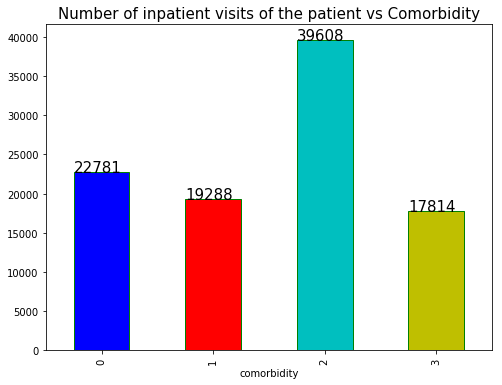

In [65]:
fig = num_in_ct.plot(kind='bar',figsize=(8,6), width=0.5,edgecolor='g', color = ['b','r','c','y'])
for i in fig .patches:
 # get_x pulls left or right; get_height pushes up or down
    fig.text(i.get_x()+0.00, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.title("Number of inpatient visits of the patient vs Comorbidity",fontsize= 15)
plt.show()

## Patients with comorbidity = 2 have the highest in patients visists

In [66]:
re_num_ct = pd.crosstab(data.number_inpatient , data.readmitted ,  normalize='index')*100
re_num_ct

readmitted,0,1
number_inpatient,,
0,61.220769,38.779231
1,44.991414,55.008586
2,35.037473,64.962527
3,30.171903,69.828097
4,25.575607,74.424393
5,19.950434,80.049566
6,15.833333,84.166667
7,19.029851,80.970149
8,9.333333,90.666667


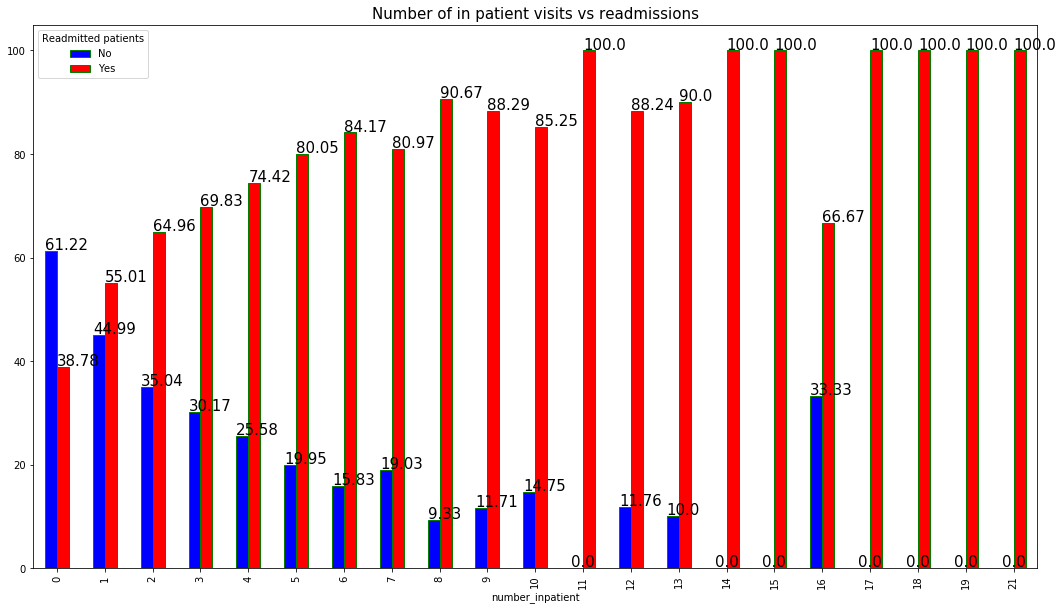

In [67]:
fig = re_num_ct.plot(kind='bar',figsize=(18,10), width=0.5,edgecolor='g', color = ['b','r'])
for i in fig .patches:
 # get_x pulls left or right; get_height pushes up or down
    fig.text(i.get_x()+0.00, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.title("Number of in patient visits vs readmissions",fontsize= 15)
fig.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))

plt.show()

## The more the number of inpatients visists more the chances of readmission.

In [68]:
num_em_ct = pd.crosstab( data.number_emergency , data.comorbidity ).sum()
num_em_ct

comorbidity
0    22781
1    19288
2    39608
3    17814
dtype: int64

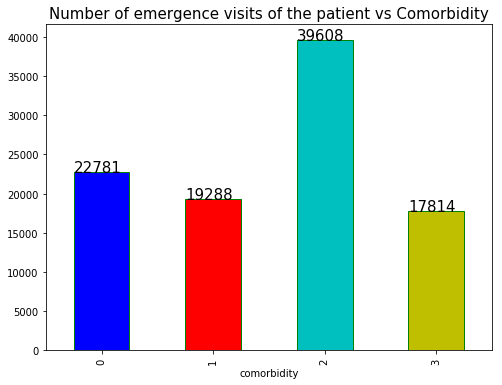

In [69]:
fig = num_em_ct.plot(kind='bar',figsize=(8,6), width=0.5,edgecolor='g', color = ['b','r','c','y'])
for i in fig .patches:
 # get_x pulls left or right; get_height pushes up or down
    fig.text(i.get_x()+0.00, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.title("Number of emergence visits of the patient vs Comorbidity",fontsize= 15)
plt.show()

In [70]:
re_em_ct = pd.crosstab(data.number_emergency , data.readmitted ,  normalize='index')*100
re_em_ct

readmitted,0,1
number_emergency,,
0,55.781966,44.218034
1,40.669731,59.330269
2,33.004440,66.995560
3,28.116343,71.883657
4,18.449198,81.550802
5,19.791667,80.208333
6,15.957447,84.042553
7,9.589041,90.410959
8,18.000000,82.000000


# Feature Engineering.

The dataset contains 23 features for 23 drugs which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient. We can count how many changes were made in total for each patient, and declared that a new feature. This may help in discovering a relationship with number of changes regardless of which drug was changed. 

In [71]:
keys = ['miglitol', 'repaglinide',  'chlorpropamide', 'acetohexamide','glimepiride', 'glipizide', 'glyburide', 
        'pioglitazone', 'rosiglitazone', 'acarbose', 'metformin', 'tolbutamide','insulin', 'glyburide-metformin', 'tolazamide', 
        'metformin-pioglitazone','metformin-rosiglitazone', 'nateglinide','glimepiride-pioglitazone', 
        'glipizide-metformin', 'troglitazone']

In [72]:
for col in keys:
    colname = str(col) + 'temp'
    data[colname] = data[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

data['num_of_change'] = 0

for col in keys:
    colname = str(col) + 'temp'
    data['num_of_change'] = data['num_of_change'] + data[colname]
    del data[colname]
    

In [73]:
data.num_of_change.value_counts()

0    72346
1    25735
2     1298
3      107
4        5
Name: num_of_change, dtype: int64

### Let us change the value of drugs columns to reflect whether that medicine is being given to a patient or not

In [74]:
for col in keys:
    data[col] = data[col].replace('No', 0)
    data[col] = data[col].replace('Steady', 1)
    data[col] = data[col].replace('Up', 1)
    data[col] = data[col].replace('Down', 1) 

#### Now based on the above we create one more column to reflect how many medicine is being administered to a patient

In [75]:
data['num_of_med'] = 0

for col in keys:
    data['num_of_med'] = data['num_of_med'] + data[col]
data['num_of_med'].value_counts()

1    46224
0    23000
2    21321
3     7574
4     1310
5       57
6        5
Name: num_of_med, dtype: int64

### after creating these 2 columns we can drop medicines columns

In [76]:
data = data.drop(columns=keys)
data.shape

(99491, 24)

Let us convert both A1C test result and Glucose serum test result into numbers.

In [77]:
data['A1Cresult'] = data['A1Cresult'].replace('>7', 1)
data['A1Cresult'] = data['A1Cresult'].replace('>8', 2)
data['A1Cresult'] = data['A1Cresult'].replace('Norm', 0)
data['A1Cresult'] = data['A1Cresult'].replace('None', -1)
# 1: test result is  abnormal
# 2: test result is  very abnormal

data['max_glu_serum'] = data['max_glu_serum'].replace('>200', 1)
data['max_glu_serum'] = data['max_glu_serum'].replace('>300', 2)
data['max_glu_serum'] = data['max_glu_serum'].replace('Norm', 0)
data['max_glu_serum'] = data['max_glu_serum'].replace('None', -1)
# 1: test result is  abnormal
# 2: test result is  very abnormal

For gender, race, medication change string data type is used. To better fit those variables into our model, we interpret the variables to numeric binary variables to reflect their nature. For example, we encoded the “medication change” feature from “No” (no change) and “Ch” (changed) into 0 and 1.

In [78]:
# code the non-numeric values
data['change'] = data['change'].replace('Ch', 1)
data['change'] = data['change'].replace('No', 0)

data['gender'] = data['gender'].replace('Male', 1)
data['gender'] = data['gender'].replace('Female', 0)

data['diabetesMed'] = data['diabetesMed'].replace('Yes', 1)
data['diabetesMed'] = data['diabetesMed'].replace('No', 0)

In [79]:
data.shape

(99491, 24)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99491 entries, 0 to 101765
Data columns (total 24 columns):
encounter_id                99491 non-null int64
patient_nbr                 99491 non-null int64
race                        99491 non-null object
gender                      99491 non-null int64
age                         99491 non-null int64
admission_type_id           99491 non-null int64
discharge_disposition_id    99491 non-null int64
admission_source_id         99491 non-null int64
time_in_hospital            99491 non-null int64
num_lab_procedures          99491 non-null int64
num_procedures              99491 non-null int64
num_medications             99491 non-null int64
number_outpatient           99491 non-null int64
number_emergency            99491 non-null int64
number_inpatient            99491 non-null int64
number_diagnoses            99491 non-null int64
max_glu_serum               99491 non-null int64
A1Cresult                   99491 non-null int64
change 

In [81]:
# get list of only numeric features
numerics = list(set(list(data._get_numeric_data().columns))- {'readmitted'})

In [82]:
numerics

['number_emergency',
 'time_in_hospital',
 'A1Cresult',
 'max_glu_serum',
 'num_medications',
 'num_lab_procedures',
 'number_diagnoses',
 'diabetesMed',
 'patient_nbr',
 'num_of_change',
 'num_of_med',
 'admission_source_id',
 'number_inpatient',
 'discharge_disposition_id',
 'change',
 'comorbidity',
 'gender',
 'age',
 'encounter_id',
 'number_outpatient',
 'num_procedures',
 'admission_type_id']

In [83]:
# Create service utilization as a new feature
data['service_utilization'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']

In [84]:
# get list of only numeric features
numerics = list(set(list(data._get_numeric_data().columns))- {'readmitted'})
numerics

['number_emergency',
 'time_in_hospital',
 'A1Cresult',
 'max_glu_serum',
 'num_medications',
 'num_lab_procedures',
 'number_diagnoses',
 'service_utilization',
 'diabetesMed',
 'patient_nbr',
 'num_of_change',
 'num_of_med',
 'admission_source_id',
 'number_inpatient',
 'discharge_disposition_id',
 'change',
 'comorbidity',
 'gender',
 'age',
 'encounter_id',
 'number_outpatient',
 'num_procedures',
 'admission_type_id']

In [85]:
data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                       int64
age                          int64
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
max_glu_serum                int64
A1Cresult                    int64
change                       int64
diabetesMed                  int64
readmitted                   int32
comorbidity                  int64
num_of_change                int64
num_of_med                   int64
service_utilization          int64
dtype: object

In [86]:
data.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

In [87]:
data.shape

(99491, 23)

## Normalization of data.

In [88]:
num_vars = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

from sklearn.preprocessing import StandardScaler

normal = StandardScaler()

data[num_vars] = normal.fit_transform(data[num_vars])

data.describe()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidity,num_of_change,num_of_med,service_utilization
count,99491.000000,99491.000000,99491.000000,99491.000000,99491.000000,9.949100e+04,9.949100e+04,9.949100e+04,9.949100e+04,9.949100e+04,...,9.949100e+04,99491.000000,99491.000000,99491.000000,99491.000000,99491.000000,99491.000000,99491.000000,99491.000000,99491.000000
mean,0.461509,65.955262,1.785197,2.835101,5.148988,4.248719e-14,6.623487e-16,9.701675e-15,1.189902e-14,9.347913e-14,...,-1.525944e-13,-0.906906,-0.635666,0.461449,0.768823,0.464122,1.527234,0.288187,1.177423,1.217809
std,0.498519,15.943794,1.334130,5.052172,2.875310,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,0.435275,0.886954,0.498514,0.421587,0.498714,1.032145,0.488146,0.920567,2.308702
min,0.000000,5.000000,1.000000,1.000000,1.000000,-1.137754e+00,-2.136233e+00,-7.868436e-01,-1.850606e+00,-2.924179e-01,...,-3.343294e+00,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,55.000000,1.000000,1.000000,1.000000,-8.029660e-01,-6.130140e-01,-7.868436e-01,-7.422055e-01,-2.924179e-01,...,-7.472771e-01,-1.000000,-1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,0.000000,65.000000,1.000000,1.000000,7.000000,-1.333891e-01,4.704748e-02,-1.998805e-01,-1.264273e-01,-2.924179e-01,...,2.911299e-01,-1.000000,-1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,1.000000,75.000000,3.000000,2.000000,7.000000,5.361878e-01,7.071090e-01,3.870826e-01,4.893509e-01,-2.924179e-01,...,8.103334e-01,-1.000000,-1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000
max,1.000000,95.000000,5.000000,28.000000,14.000000,3.214495e+00,4.515156e+00,2.734935e+00,8.001845e+00,3.260221e+01,...,4.444758e+00,2.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,6.000000,80.000000


In [89]:
data.shape

(99491, 23)

In [90]:
#Let's store readmitted in label and rest of the columns in Data,

label = data['readmitted']
Data_1 = data.drop(['readmitted'], axis =1)
Data_1 = pd.get_dummies(Data_1)

In [91]:
Data_1.shape

(99491, 26)

In [92]:
Data_1.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,diabetesMed,comorbidity,num_of_change,num_of_med,service_utilization,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other
0,0,5,5,18,1,-1.137754,-0.105274,-0.786844,-1.850606,-0.292418,...,0,1,0,0,0,0,0,1,0,0
1,0,15,1,1,7,-0.468178,0.808657,-0.786844,0.243040,-0.292418,...,1,1,1,1,0,0,0,1,0,0
2,0,25,1,1,7,-0.802966,-1.628493,2.147972,-0.372739,1.273993,...,1,1,0,1,3,1,0,0,0,0
3,1,35,1,1,7,-0.802966,0.047047,-0.199880,-0.003272,-0.292418,...,1,3,1,1,0,0,0,1,0,0
4,1,45,1,1,7,-1.137754,0.402465,-0.786844,-0.988517,-0.292418,...,1,1,0,2,0,0,0,1,0,0


In [93]:
from sklearn.model_selection import train_test_split

In [94]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( Data_1, label, test_size = .2, random_state = 0 , stratify = label )

In [95]:
print('The shape of Xtrain : ',Xtrain.shape)
print('The shape of Ytrain : ',Ytrain.shape)
print('The shape of Xtest : ',Xtest.shape)
print('The shape of Ytest : ',Ytest.shape)

The shape of Xtrain :  (79592, 26)
The shape of Ytrain :  (79592,)
The shape of Xtest :  (19899, 26)
The shape of Ytest :  (19899,)


# 1. Logistic Regression

In [96]:
#  logistic regression using Sklearn 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005,solver='liblinear')
lr.fit(Xtrain, Ytrain)
lr_Y_pred = lr.predict(Xtest)
lr_predict_proba =lr.predict_proba(Xtest)[:,1] # Required for roc

In [97]:
# Checking the accuracy of the model 
lr_accuracy = lr.score(Xtest, Ytest)*100
print(" The % accuracy of the Logistic regression model:" ,lr_accuracy)

 The % accuracy of the Logistic regression model: 61.515654052967484


In [98]:
# checking the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score,precision_score

cm1 =confusion_matrix(Ytest, lr_Y_pred)
total1=sum(sum(cm1))
print(cm1)
accuracy = (cm1[0,0]+cm1[1,1])/total1
    
speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('accuracy : ',accuracy,',','sensitivity :',sensi,',','specificity :',speci)

[[8555 2108]
 [5550 3686]]
accuracy :  0.6151565405296748 , sensitivity : 0.39909051537462104 , specificity : 0.802307043046047


In [99]:
print('Precision score : ',precision_score(Ytest , lr_Y_pred))

Precision score :  0.6361753538142907


In [100]:
print('Recall score : ' , recall_score(Ytest , lr_Y_pred))

Recall score :  0.39909051537462104


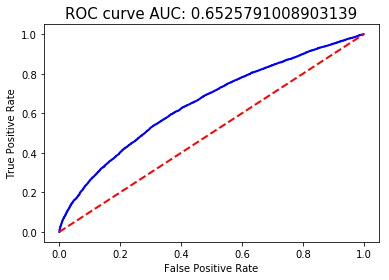

In [101]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
lr_fpr, lr_tpr, thresholds = roc_curve(Ytest, lr_predict_proba)#logistic regression
#fpr, tpr,_=roc_curve(lr.predict(Xtrain),Ytrain,drop_intermediate=False)
lr_roc_auc = metrics.auc(lr_fpr, lr_tpr)
import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(lr_fpr, lr_tpr, color='blue',
 lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plot_title = 'ROC curve AUC: {0}'.format(lr_roc_auc)
plt.title(plot_title , size=15)
plt.show()

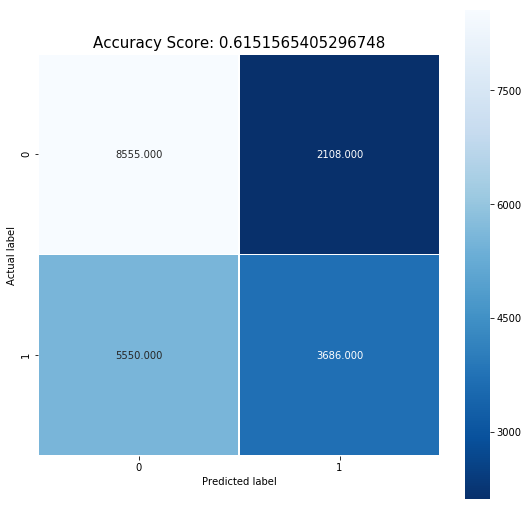

In [102]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, lr_Y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(lr.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [103]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(Ytest, lr_Y_pred, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.61      0.80      0.69     10663
         YES       0.64      0.40      0.49      9236

    accuracy                           0.62     19899
   macro avg       0.62      0.60      0.59     19899
weighted avg       0.62      0.62      0.60     19899



## Feature Importance

In [104]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = Xtrain.columns
vif['VIF'] = [variance_inflation_factor(Xtrain.values, i) for i in range(Xtrain.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = True)
vif

C:\Users\apurv\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,gender,1.020000
3,discharge_disposition_id,1.030000
17,comorbidity,1.070000
14,A1Cresult,1.120000
1,age,1.190000
12,number_diagnoses,1.250000
4,admission_source_id,1.250000
7,num_procedures,1.270000
6,num_lab_procedures,1.310000
2,admission_type_id,1.330000


In [105]:
vif['Features']

0                       gender
3     discharge_disposition_id
17                 comorbidity
14                   A1Cresult
1                          age
12            number_diagnoses
4          admission_source_id
7               num_procedures
6           num_lab_procedures
2            admission_type_id
13               max_glu_serum
5             time_in_hospital
8              num_medications
18               num_of_change
16                 diabetesMed
15                      change
19                  num_of_med
11            number_inpatient
10            number_emergency
9            number_outpatient
20         service_utilization
21        race_AfricanAmerican
22                  race_Asian
23              race_Caucasian
24               race_Hispanic
25                  race_Other
Name: Features, dtype: object

# 2. Random Forest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
random_forest = RandomForestClassifier(random_state=42,n_estimators=100,min_samples_split =10)
gridparam ={
        'n_estimators': [100, 200,500],
        'min_samples_split': [5,10,15],
},
rf = GridSearchCV(random_forest, cv=3, param_grid=gridparam)
rf.fit(Xtrain, Ytrain)
rf_Y_pred = rf.predict(Xtest)
rf_predict_proba =rf.predict_proba(Xtest)[:,1] # Required for roc

In [107]:
#Checking the accuracy,
rf_accuracy=rf.score(Xtest, Ytest)*100
print(" % Accuracy of Randomeforest classification: ",rf_accuracy )

 % Accuracy of Randomeforest classification:  63.7619980903563


In [108]:
# checking the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score,precision_score

cm1 =confusion_matrix(Ytest, rf_Y_pred)
total1=sum(sum(cm1))
print(cm1)
accuracy = (cm1[0,0]+cm1[1,1])/total1
    
speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('accuracy : ',accuracy,',','sensitivity :',sensi,',','specificity :',speci)

[[7821 2842]
 [4369 4867]]
accuracy :  0.637619980903563 , sensitivity : 0.5269597228237333 , specificity : 0.7334708806152115


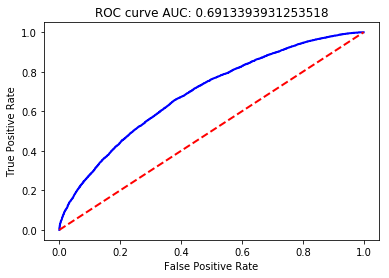

In [109]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve 
import sklearn.metrics as metrics
rf_fpr, rf_tpr, thresholds = roc_curve(Ytest, rf_predict_proba) #Random Forest Classifier
#fpr, tpr,_=roc_curve(lr.predict(Xtrain),Ytrain,drop_intermediate=False)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)
import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(rf_fpr, rf_tpr, color='blue',
 lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plot_title = 'ROC curve AUC: {0}'.format(rf_roc_auc)
plt.title(plot_title)
plt.show()

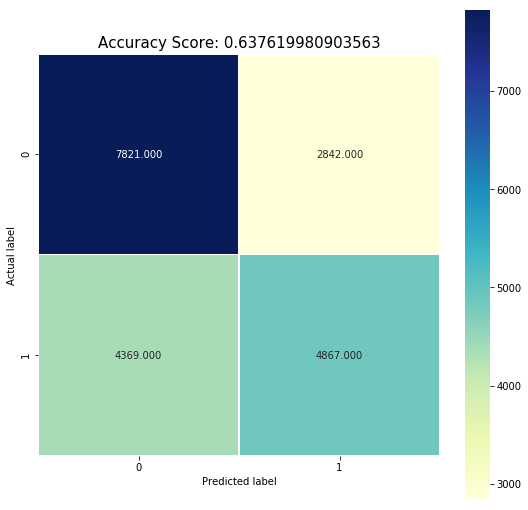

In [110]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, rf_Y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(rf.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [111]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(Ytest, rf_Y_pred, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.64      0.73      0.68     10663
         YES       0.63      0.53      0.57      9236

    accuracy                           0.64     19899
   macro avg       0.64      0.63      0.63     19899
weighted avg       0.64      0.64      0.63     19899



In [112]:
importances = rf.best_estimator_.feature_importances_
importances

array([0.01928314, 0.06443708, 0.02233998, 0.05975306, 0.02943057,
       0.07770496, 0.14124934, 0.05235492, 0.11710088, 0.01909797,
       0.01871531, 0.06398644, 0.05804295, 0.00999975, 0.02698773,
       0.01072046, 0.00715754, 0.03987535, 0.01619897, 0.03177984,
       0.07548429, 0.01211402, 0.00269849, 0.0131542 , 0.00556651,
       0.00476624])

In [113]:
feature_importances = pd.DataFrame(rf.best_estimator_.feature_importances_,
                                   index = Xtrain.columns,
                                   columns=['importance']).sort_values('importance', ascending=False) 
feature_importances

,importance
num_lab_procedures,0.141249
num_medications,0.117101
time_in_hospital,0.077705
service_utilization,0.075484
age,0.064437
number_inpatient,0.063986
discharge_disposition_id,0.059753
number_diagnoses,0.058043
num_procedures,0.052355
comorbidity,0.039875


# 3. Decision Tree Classifier

In [114]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [115]:
dte = DecisionTreeClassifier(max_depth=5, criterion = "gini", min_samples_split=5)
gridparam ={
       'criterion' : ['gini','entropy'],
       'max_depth' : [5, 10,15],
       'min_samples_split': [5,10,15]
},
#gridparam={
 #       'min_samples_split' : range(10,500,20),
#        'max_depth'         : range(1,20,2)
#        'criterion'         : range ('gini','entropy')
#}
dt = GridSearchCV(dte, cv=3, param_grid=gridparam)
dt.fit(Xtrain, Ytrain)
dt_Y_pred = dt.predict(Xtest)
dt_predict_proba =dt.predict_proba(Xtest)[:,1] # Required for roc
#print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dt, Xtrain, Ytrain, cv=10))))
#print("Dev Set score: {:.2%}".format(dt.score(Xtest, Ytest)))

In [116]:
#Checking the accuracy,
dt_accuracy=dt.score(Xtest, Ytest)*100
print(" % Accuracy of Decision Tree classification: ",dt_accuracy )

 % Accuracy of Decision Tree classification:  62.390069852756426


In [117]:
print(dt.best_score_)
print(dt.best_params_)

0.6250502563071666
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}


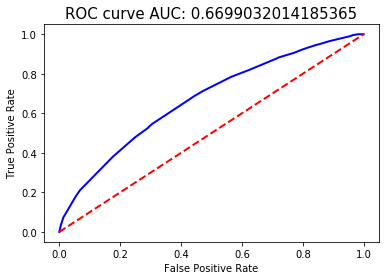

In [118]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve 
import sklearn.metrics as metrics
dt_fpr, dt_tpr, thresholds = roc_curve(Ytest, dt_predict_proba) #Random Forest Classifier
#fpr, tpr,_=roc_curve(lr.predict(Xtrain),Ytrain,drop_intermediate=False)
dt_roc_auc = metrics.auc(dt_fpr, dt_tpr)
import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(dt_fpr, dt_tpr, color='blue',lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plot_title = 'ROC curve AUC: {0}'.format(dt_roc_auc)
plt.title(plot_title, size=15)
plt.show()

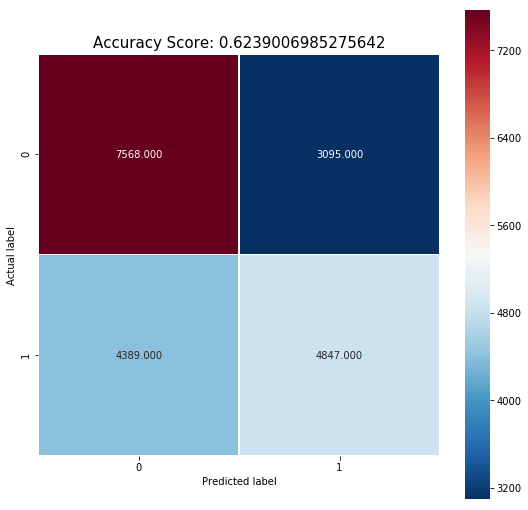

In [119]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, dt_Y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'RdBu_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plot_title = 'Accuracy Score: {0}'.format(dt.score(Xtest, Ytest))
plt.title(plot_title, size = 15);

In [120]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(Ytest, dt_Y_pred, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.63      0.71      0.67     10663
         YES       0.61      0.52      0.56      9236

    accuracy                           0.62     19899
   macro avg       0.62      0.62      0.62     19899
weighted avg       0.62      0.62      0.62     19899



In [121]:
feature_importances = pd.DataFrame(dt.best_estimator_.feature_importances_,
                                   index = Xtrain.columns,
                                   columns=['importance']).sort_values('importance', ascending=False) 
feature_importances

,importance
service_utilization,0.529460
discharge_disposition_id,0.190121
number_inpatient,0.127169
number_diagnoses,0.069544
age,0.027938
diabetesMed,0.020349
admission_source_id,0.012001
time_in_hospital,0.009594
num_lab_procedures,0.005776
comorbidity,0.002835


## AdaBoost

In [122]:
# Doing parameter tuning,
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ada_boost = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
gridparam ={
        'n_estimators': [100,200,500],
        'learning_rate': [0.2,0.5,1.0],
},
ab = GridSearchCV(ada_boost,cv=3,n_jobs=3, param_grid=gridparam)
ab.fit(Xtrain, Ytrain)
ab_Y_pred = ab.predict(Xtest)
ab_predict_proba =ab.predict_proba(Xtest)[:,1] # Required for roc

In [123]:
#Checking the accuracy,
ab_accuracy=dt.score(Xtest, Ytest)*100
print(" % Accuracy of AdaBoost  classifier: ",ab_accuracy )

 % Accuracy of AdaBoost  classifier:  62.390069852756426


In [124]:
print(ab.best_score_)
print(ab.best_params_)

0.6353025429691427
{'learning_rate': 1.0, 'n_estimators': 500}


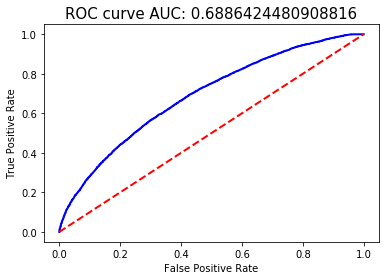

In [125]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve 
import sklearn.metrics as metrics
ab_fpr, ab_tpr, thresholds = roc_curve(Ytest, ab_predict_proba) #AdaBoost Classifier
ab_roc_auc = metrics.auc(ab_fpr, ab_tpr)
import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(ab_fpr, ab_tpr, color='blue',lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plot_title = 'ROC curve AUC: {0}'.format(ab_roc_auc)
plt.title(plot_title, size=15)
plt.show()

In [126]:
feature_importances = pd.DataFrame(ab.best_estimator_.feature_importances_,
                                   index = Xtrain.columns,
                                   columns=['importance']).sort_values('importance', ascending=False) 
feature_importances

,importance
discharge_disposition_id,0.430
number_inpatient,0.084
service_utilization,0.078
num_medications,0.072
num_lab_procedures,0.070
number_emergency,0.054
admission_source_id,0.042
number_outpatient,0.042
number_diagnoses,0.020
A1Cresult,0.018


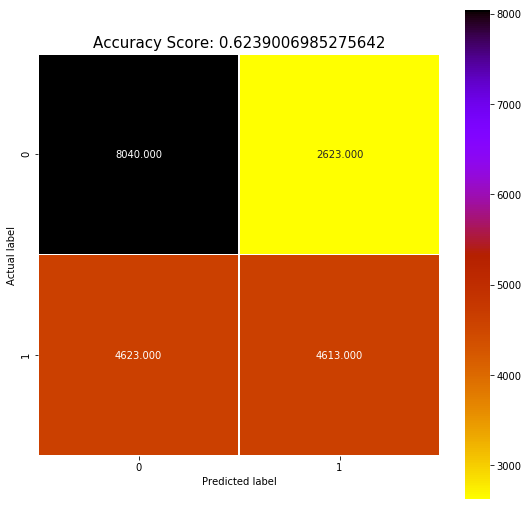

In [127]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, ab_Y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'gnuplot_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plot_title = 'Accuracy Score: {0}'.format(dt.score(Xtest, Ytest))
plt.title(plot_title, size = 15);

# A.N.N

In [128]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [129]:
classifier = Sequential()

In [130]:
classifier.add(Dense(units = 26, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
# classifier.add(Dropout(p = 0.1))


Instructions for updating:
Colocations handled automatically by placer.


In [131]:
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
#classifier.add(Dropout(p = 0.1))

In [132]:
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
# classifier.add(Dropout(p = 0.1))


In [133]:
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
# classifier.add(Dropout(p = 0.1))

In [134]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [135]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [136]:
classifier.fit(Xtrain, Ytrain, batch_size = 10, epochs = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
79592/79592 [==============================] - 21s 265us/step - loss: 0.6550 - acc: 0.6157
Epoch 2/100
79592/79592 [==============================] - 19s 238us/step - loss: 0.6486 - acc: 0.6212
Epoch 3/100
79592/79592 [==============================] - 19s 235us/step - loss: 0.6460 - acc: 0.6231
Epoch 4/100
79592/79592 [==============================] - 19s 237us/step - loss: 0.6430 - acc: 0.6270
Epoch 5/100
79592/79592 [==============================] - 19s 241us/step - loss: 0.6404 - acc: 0.6284
Epoch 6/100
79592/79592 [==============================] - 19s 245us/step - loss: 0.6386 - acc: 0.6298
Epoch 7/100
79592/79592 [==============================] - 19s 242us/step - loss: 0.6377 - acc: 0.6306
Epoch 8/100
79592/79592 [==============================] - 19s 238us/step - loss: 0.6366 - acc: 0.6315
Epoch 9/100
79592/79592 [==============================] - 19s 244us/step - loss: 0.6363 - acc: 0.6319
Epoch 10/100
79592/79592 

79592/79592 [==============================] - 20s 246us/step - loss: 0.6256 - acc: 0.6411
Epoch 77/100
79592/79592 [==============================] - 20s 245us/step - loss: 0.6257 - acc: 0.6412
Epoch 78/100
79592/79592 [==============================] - 20s 256us/step - loss: 0.6260 - acc: 0.6410
Epoch 79/100
79592/79592 [==============================] - 20s 255us/step - loss: 0.6246 - acc: 0.6416
Epoch 80/100
79592/79592 [==============================] - 20s 256us/step - loss: 0.6246 - acc: 0.6421
Epoch 81/100
79592/79592 [==============================] - 20s 252us/step - loss: 0.6246 - acc: 0.6410
Epoch 82/100
79592/79592 [==============================] - 20s 246us/step - loss: 0.6247 - acc: 0.6421
Epoch 83/100
79592/79592 [==============================] - 19s 243us/step - loss: 0.6248 - acc: 0.6409
Epoch 84/100
79592/79592 [==============================] - 19s 241us/step - loss: 0.6247 - acc: 0.6407
Epoch 85/100
79592/79592 [==============================] - 19s 244us/step - 

In [137]:
n_Y_pred = classifier.predict(Xtest)

In [138]:
n_Y_pred

array([[0.3629598 ],
       [0.34012374],
       [0.6116887 ],
       ...,
       [0.3768453 ],
       [0.38617495],
       [0.71332735]], dtype=float32)

In [139]:
nn_Y_pred = (n_Y_pred > 0.5)

In [140]:
nn_Y_pred

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [141]:
print(np.where(nn_Y_pred == 'True', 1, nn_Y_pred) )

Y_nn_pred = np.where(nn_Y_pred == 'True', 1, nn_Y_pred)
Y_nn_pred

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [1]]


C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.
C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [142]:
Y_nn_pred = np.where(nn_Y_pred == 'False', 0, nn_Y_pred)
Y_nn_pred

C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [143]:
Y_nn_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [144]:
# checking the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score,precision_score
cm1 = metrics.confusion_matrix(Ytest, Y_nn_pred)
total1=sum(sum(cm1))
print(cm1)
accuracy = (cm1[0,0]+cm1[1,1])/total1

speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('accuracy : ',accuracy,',','sensitivity :',sensi,',','specificity :',speci)

[[7492 3171]
 [4106 5130]]
accuracy :  0.6343032313181567 , sensitivity : 0.5554352533564314 , specificity : 0.7026165244302729


In [145]:
from sklearn.metrics import accuracy_score

In [146]:
nn_acc = accuracy_score(Ytest , Y_nn_pred)*100
print('accuracy score: ',nn_acc)

accuracy score:  63.43032313181567


In [147]:
print('Precision score : ',precision_score(Ytest , Y_nn_pred))

Precision score :  0.6179978315865559


In [148]:
print('Recall score : ' , recall_score(Ytest , Y_nn_pred))

Recall score :  0.5554352533564314


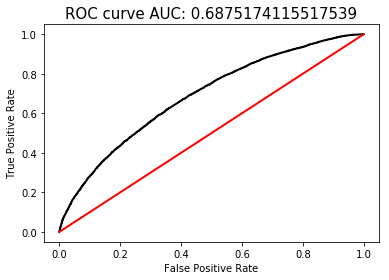

In [172]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
nn_fpr, nn_tpr, thresholds = roc_curve(Ytest, n_Y_pred)#logistic regression
#fpr, tpr,_=roc_curve(lr.predict(Xtrain),Ytrain,drop_intermediate=False)
nn_roc_auc = metrics.auc(nn_fpr, nn_tpr)
import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(nn_fpr, nn_tpr, color='black',
 lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='-')
##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plot_title = 'ROC curve AUC: {0}'.format(nn_roc_auc)
plt.title(plot_title , size=15)
plt.show()

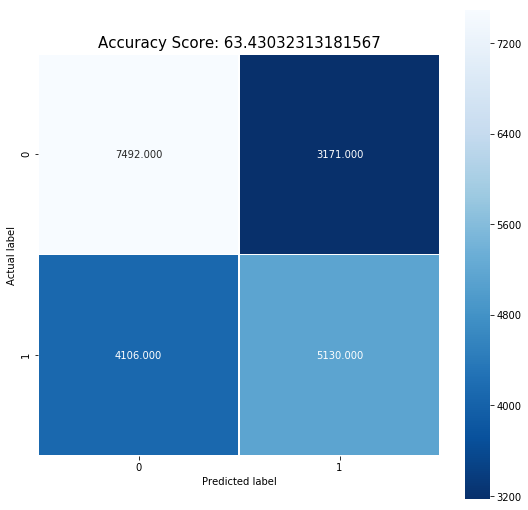

In [150]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, nn_Y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(nn_acc)
plt.title(all_sample_title, size = 15);

In [151]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(Ytest, nn_Y_pred, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.65      0.70      0.67     10663
         YES       0.62      0.56      0.59      9236

    accuracy                           0.63     19899
   macro avg       0.63      0.63      0.63     19899
weighted avg       0.63      0.63      0.63     19899



In [152]:
params = {'alpha': [0.0001,0.0002,0.0003,0.0004,0.0005,0.001, ]}

folds=5


lasso= Lasso()
model_cv= GridSearchCV(estimator=lasso, param_grid=params , scoring='neg_mean_absolute_error',
                       cv=folds, return_train_score=True, verbose=1)
model_cv.fit(Xtrain , Ytrain)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   16.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [153]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results=cv_results[cv_results['param_alpha'] <=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.174189,0.090287,0.014285,0.016434,0.0001,{'alpha': 0.0001},-0.465191,-0.463984,-0.465974,-0.466177,...,-0.465335,0.000770,1,-0.465197,-0.465906,-0.464627,-0.464819,-0.465087,-0.465127,0.000438
1,0.681225,0.115013,0.007647,0.005219,0.0002,{'alpha': 0.0002},-0.465267,-0.464074,-0.466057,-0.466243,...,-0.465411,0.000764,2,-0.465278,-0.465988,-0.464710,-0.464901,-0.465170,-0.465210,0.000437
2,0.470213,0.065633,0.007347,0.002235,0.0003,{'alpha': 0.0003},-0.465333,-0.464164,-0.466136,-0.466310,...,-0.465485,0.000758,3,-0.465355,-0.466068,-0.464791,-0.464983,-0.465251,-0.465289,0.000437
3,0.340421,0.011414,0.006984,0.001092,0.0004,{'alpha': 0.0004},-0.465398,-0.464244,-0.466213,-0.466380,...,-0.465558,0.000756,4,-0.465432,-0.466142,-0.464868,-0.465062,-0.465328,-0.465366,0.000435
4,0.288552,0.007521,0.006989,0.000642,0.0005,{'alpha': 0.0005},-0.465463,-0.464325,-0.466291,-0.466457,...,-0.465631,0.000755,5,-0.465509,-0.466216,-0.464945,-0.465137,-0.465405,-0.465442,0.000435


In [154]:
model_cv.best_score_

-0.46533536866856884

In [155]:
model_cv.best_params_

{'alpha': 0.0001}

In [156]:
alpha=0.0001

lasso=Lasso(alpha=alpha)
lasso.fit(Xtrain,Ytrain)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [157]:
lasso.coef_

array([-0.01530764,  0.00040612,  0.00736918, -0.00440928,  0.00482567,
        0.01428133,  0.00701544, -0.01899786, -0.00174175, -0.        ,
        0.00565468,  0.06960861,  0.03835915, -0.0058218 , -0.00429373,
       -0.        ,  0.05991981,  0.02070488,  0.01896486, -0.00589858,
        0.0174232 ,  0.02929871, -0.02327047,  0.03802799,  0.        ,
       -0.00446818])

In [158]:
Xtrain=pd.DataFrame(Xtrain)

In [159]:
main_coef=pd.Series(lasso.coef_,index=Xtrain.columns)
var_selected= sum(lasso.coef_!=0)
print("the num of feautes selected by lasso : ",var_selected)

the num of feautes selected by lasso :  23


## Significant features as per A.N.N

In [160]:
main_features=pd.concat([main_coef.sort_values(ascending=False).head(10),main_coef.sort_values(ascending=False).tail(10)])
main_features

number_inpatient            0.069609
diabetesMed                 0.059920
number_diagnoses            0.038359
race_Caucasian              0.038028
race_AfricanAmerican        0.029299
comorbidity                 0.020705
num_of_change               0.018965
service_utilization         0.017423
time_in_hospital            0.014281
admission_type_id           0.007369
change                     -0.000000
num_medications            -0.001742
A1Cresult                  -0.004294
discharge_disposition_id   -0.004409
race_Other                 -0.004468
max_glu_serum              -0.005822
num_of_med                 -0.005899
gender                     -0.015308
num_procedures             -0.018998
race_Asian                 -0.023270
dtype: float64

C:\Users\apurv\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, 'True Positive Rate')

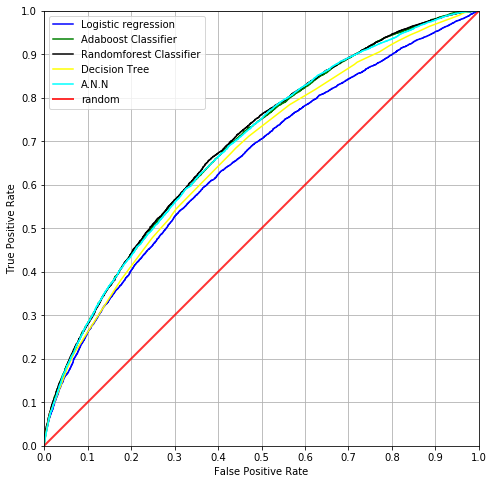

In [174]:
#compare the ROC curve between different models
plt.figure(figsize=(8,8))
plt.plot(lr_fpr, lr_tpr, label='Logistic regression',color = 'blue')
plt.plot(ab_fpr, ab_tpr, label='Adaboost Classifier', color = 'green')
plt.plot(rf_fpr, rf_tpr, label='Randomforest Classifier',color = 'black')
plt.plot(dt_fpr, dt_tpr, label='Decision Tree', color = 'yellow')
plt.plot(nn_fpr, nn_tpr, label='A.N.N', color = 'cyan')

#plt.plot(nn_fpr, nn_tpr, color='black',
 #lw=2, label='ROC curve')



plt.plot([0, 1], [0, 1], linestyle='-', lw=2, color='r',label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [162]:
score = [    (lr_accuracy, lr_roc_auc) ,
             (rf_accuracy, rf_roc_auc) ,
             (dt_accuracy, dt_roc_auc) ,
             (ab_accuracy, ab_roc_auc),   
              (nn_acc , nn_roc_auc) ]
df_score = pd.DataFrame(score, columns = ['Accuracy' , 'AUC'], index=['LogisticRegression','RandomForest','DecisionTree','AdaBoost','A.N.N']) 

In [163]:
df_score

,Accuracy,AUC
LogisticRegression,61.515654,0.652579
RandomForest,63.761998,0.691339
DecisionTree,62.390070,0.669903
AdaBoost,62.390070,0.688642
A.N.N,63.430323,0.687517


## Risk Stratification

Using Random Forest as a final model as it has the highest accuracy and AUC accuracy. 

In [164]:
rf_predict_proba

array([0.28298351, 0.45228638, 0.6624865 , ..., 0.47504932, 0.35638504,
       0.66960015])

In [165]:
risk_bucket_df=pd.DataFrame(rf_predict_proba,columns = ['Probability'])
risk_bucket_df['Probability'][(risk_bucket_df['Probability']<0.25)].count()

1710

In [176]:
def classify_risk(row):
    if row[0] <= 0.3 : return 'LOW'
    if row[0] >= 0.6 : return 'HIGH'
    return 'MEDIUM'

In [177]:
Risk_Bucket = pd.DataFrame()
Risk_Bucket['Risk']= risk_bucket_df.apply(classify_risk, axis=1)

In [178]:
Risk_Bucket['Risk'].value_counts()

MEDIUM    12679
HIGH       4095
LOW        3125
Name: Risk, dtype: int64

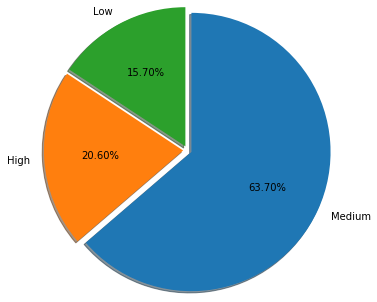

In [179]:
percent = round(Risk_Bucket.Risk.value_counts()/len(Risk_Bucket.index)*100,1)

sub=['Medium','High','Low']

plt.axis("equal")
plt.pie(percent , labels=sub,radius=1.6,autopct='%1.2f%%',explode=[0.05,0.05,0.05],startangle=90,shadow=True,counterclock=False,pctdistance=0.6)
plt.show()

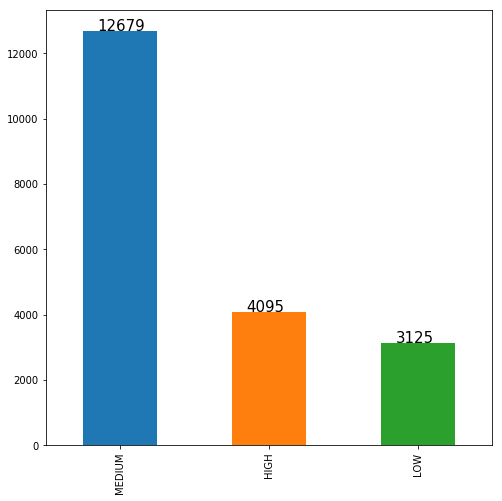

In [183]:
plt.figure(figsize=(8,8))
figx = Risk_Bucket['Risk'].value_counts().plot.bar()

for i in figx.patches:
     # get_x pulls left or right; get_height pushes up or down
    figx.text(i.get_x()+.1, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)


plt.show()